In [27]:
!pip install opencv-python-headless


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [28]:
import boto3, cv2, time, numpy as np, matplotlib.pyplot as plt, random
from sagemaker.pytorch import PyTorchPredictor
from sagemaker.deserializers import JSONDeserializer
from PIL import Image

In [29]:
sm_client = boto3.client(service_name="sagemaker")

# Restore the endpoint name stored in the 2_DeployEndpoint.ipynb notebook
ENDPOINT_NAME = 'pose-deploy-staging'
print(f'Endpoint Name: {ENDPOINT_NAME}')

endpoint_created = False
while True:
    response = sm_client.list_endpoints()
    for ep in response['Endpoints']:
        print(f"Endpoint Status = {ep['EndpointStatus']}")
        if ep['EndpointName']==ENDPOINT_NAME and ep['EndpointStatus']=='InService':
            endpoint_created = True
            break
    if endpoint_created:
        break
    time.sleep(5)


Endpoint Name: pose-deploy-staging
Endpoint Status = InService


In [31]:
predictor = PyTorchPredictor(endpoint_name=ENDPOINT_NAME,
                             deserializer=JSONDeserializer())

(1080, 810, 3)


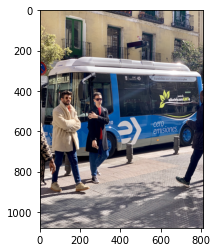

In [32]:


orig_image = cv2.imread('bus.jpg')
print(orig_image.shape)

image_height, image_width, _ = orig_image.shape
model_height, model_width = 1080, 810
x_ratio = image_width/model_width
y_ratio = image_height/model_height
plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
plt.show()


In [33]:
# infer_start_time = time.time()

# resized_image = cv2.resize(orig_image, (model_height, model_width))
# print(resized_image.shape)

# with open("bus.jpg", "rb") as f:
#     bin_img = f.read()
    
# payload = cv2.imencode('.jpg', orig_image)[1].tobytes()
# result = predictor.predict(bin_img, initial_args={'ContentType' : 'image/jpeg'})
# print(result)


# infer_end_time = time.time()

# print(f"Inference Time = {infer_end_time - infer_start_time:0.4f} seconds")

# if 'boxes' in result:
#     for idx,(x1,y1,x2,y2,conf,lbl) in enumerate(result['boxes']):
#         # Draw Bounding Boxes
#         x1, x2 = int(x_ratio*x1), int(x_ratio*x2)
#         y1, y2 = int(y_ratio*y1), int(y_ratio*y2)
#         color = (random.randint(10,255), random.randint(10,255), random.randint(10,255))
#         cv2.rectangle(orig_image, (x1,y1), (x2,y2), color, 4)
#         cv2.putText(orig_image, f"Class: {int(lbl)}", (x1,y1-40), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
#         cv2.putText(orig_image, f"Conf: {int(conf*100)}", (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
#         if 'masks' in result:
#             # Draw Masks
#             mask = cv2.resize(np.asarray(result['masks'][idx]), dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
#             for c in range(3):
#                 orig_image[:,:,c] = np.where(mask>0.5, orig_image[:,:,c]*(0.5)+0.5*color[c], orig_image[:,:,c])

# if 'probs' in result:
#     # Find Class
#     lbl = result['probs'].index(max(result['probs']))
#     color = (random.randint(10,255), random.randint(10,255), random.randint(10,255))
#     cv2.putText(orig_image, f"Class: {int(lbl)}", (20,20), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
    
# if 'keypoints' in result:
#     # Define the colors for the keypoints and lines
#     keypoint_color = (random.randint(10,255), random.randint(10,255), random.randint(10,255))
#     line_color = (random.randint(10,255), random.randint(10,255), random.randint(10,255))

#     # Define the keypoints and the lines to draw
#     # keypoints = keypoints_array[:, :, :2]  # Ignore the visibility values
#     lines = [
#         (0, 1), (0, 2), (1, 3), (2, 4),  # Head
#         (5, 6), (5, 7), (7, 9), (6, 8), (8, 10),  # Torso
#         (11, 12), (11, 13), (13, 15), (12, 14), (14, 16)  # Legs
#     ]

#     # Draw the keypoints and the lines on the image
#     for keypoints_instance in result['keypoints']:
#         # Draw the keypoints
#         for keypoint in keypoints_instance:
#             if keypoint[2] == 0:  # If the keypoint is not visible, skip it
#                 continue
#             cv2.circle(orig_image, (int(x_ratio*keypoint[:2][0]),int(y_ratio*keypoint[:2][1])), radius=5, color=keypoint_color, thickness=-1)

#         # Draw the lines
#         for line in lines:
#             start_keypoint = keypoints_instance[line[0]]
#             end_keypoint = keypoints_instance[line[1]]
#             if start_keypoint[2] == 0 or end_keypoint[2] == 0:  # If any of the keypoints is not visible, skip the line
#                 continue
#             cv2.line(orig_image, (int(x_ratio*start_keypoint[:2][0]),int(y_ratio*start_keypoint[:2][1])),(int(x_ratio*end_keypoint[:2][0]),int(y_ratio*end_keypoint[:2][1])), color=line_color, thickness=5)

# plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
# plt.show()

(810, 1080, 3)


ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (500) from primary and could not load the entire response body. See https://ap-northeast-2.console.aws.amazon.com/cloudwatch/home?region=ap-northeast-2#logEventViewer:group=/aws/sagemaker/Endpoints/pose-deploy-staging in account 600204363646 for more information.

In [34]:
import numpy as np

In [45]:
import json
import boto3
import cv2
import numpy as np
import base64
from PIL import Image
import io

sm_client = boto3.client(service_name="sagemaker-runtime")
ENDPOINT_NAME = 'pose-deploy-staging'

Inference Time = 0.1280 seconds
[[43.0, 397.0, 241.0, 907.0, 0.902658998966217, 0.0], [670.0, 391.0, 810.0, 874.0, 0.8848469853401184, 0.0], [225.0, 405.0, 344.0, 856.0, 0.8823488354682922, 0.0], [0.0, 477.0, 68.0, 904.0, 0.4145948886871338, 0.0]]
43 397 241 907
670 391 810 874
225 405 344 856
0 477 68 904


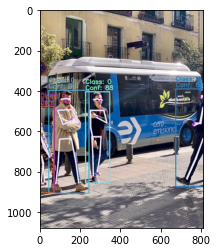

In [46]:
def image_to_byte_array(image: Image) -> bytes:
  # BytesIO is a file-like buffer stored in memory
  imgByteArr = io.BytesIO()
  # image.save expects a file-like as a argument
  image.save(imgByteArr, format=image.format)
  # Turn the BytesIO object back into a bytes object
  imgByteArr = imgByteArr.getvalue()
  return imgByteArr

blank_image = np.zeros((300, 300, 3), np.uint8)

#data = np.array(blank_image.astype(np.float32)/255.)
#payload = cv2.imencode('.jpg', blank_image)
#payload = cv2.imencode('.jpg', blank_image)[1].tobytes()

with open("bus.jpg", "rb") as f:
    b64_string = f.read()
    #print(b64_string)
    
b64_string = Image.open("bus.jpg", mode='r')
b64_string = image_to_byte_array(b64_string)

infer_start_time = time.time()

response = sm_client.invoke_endpoint(
    EndpointName=ENDPOINT_NAME,
    ContentType="image/jpeg",
    Body=b64_string)

infer_end_time = time.time()
print(f"Inference Time = {infer_end_time - infer_start_time:0.4f} seconds")

result = json.loads(response['Body'].read().decode('utf-8'))
#print(result)

if 'boxes' in result:
    print(result['boxes'])
    for idx,(x1,y1,x2,y2,conf,lbl) in enumerate(result['boxes']):
        # Draw Bounding Boxes
        x1, x2 = int(x_ratio*x1), int(x_ratio*x2)
        y1, y2 = int(y_ratio*y1), int(y_ratio*y2)
        print(x1, y1, x2, y2)
        color = (random.randint(10,255), random.randint(10,255), random.randint(10,255))
        cv2.rectangle(orig_image, (x1,y1), (x2,y2), color, 4)
        cv2.putText(orig_image, f"Class: {int(lbl)}", (x1,y1-40), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
        cv2.putText(orig_image, f"Conf: {int(conf*100)}", (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
        if 'masks' in result:
            # Draw Masks
            mask = cv2.resize(np.asarray(result['masks'][idx]), dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            for c in range(3):
                orig_image[:,:,c] = np.where(mask>0.5, orig_image[:,:,c]*(0.5)+0.5*color[c], orig_image[:,:,c])

if 'probs' in result:
    # Find Class
    lbl = result['probs'].index(max(result['probs']))
    color = (random.randint(10,255), random.randint(10,255), random.randint(10,255))
    cv2.putText(orig_image, f"Class: {int(lbl)}", (20,20), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
    
if 'keypoints' in result:
    # Define the colors for the keypoints and lines
    keypoint_color = (random.randint(10,255), random.randint(10,255), random.randint(10,255))
    line_color = (random.randint(10,255), random.randint(10,255), random.randint(10,255))

    # Define the keypoints and the lines to draw
    # keypoints = keypoints_array[:, :, :2]  # Ignore the visibility values
    lines = [
        (0, 1), (0, 2), (1, 3), (2, 4),  # Head
        (5, 6), (5, 7), (7, 9), (6, 8), (8, 10),  # Torso
        (11, 12), (11, 13), (13, 15), (12, 14), (14, 16)  # Legs
    ]

    # Draw the keypoints and the lines on the image
    for keypoints_instance in result['keypoints']:
        # Draw the keypoints
        for keypoint in keypoints_instance:
            if keypoint[2] == 0:  # If the keypoint is not visible, skip it
                continue
            cv2.circle(orig_image, (int(x_ratio*keypoint[:2][0]),int(y_ratio*keypoint[:2][1])), radius=5, color=keypoint_color, thickness=-1)

        # Draw the lines
        for line in lines:
            start_keypoint = keypoints_instance[line[0]]
            end_keypoint = keypoints_instance[line[1]]
            if start_keypoint[2] == 0 or end_keypoint[2] == 0:  # If any of the keypoints is not visible, skip the line
                continue
            cv2.line(orig_image, (int(x_ratio*start_keypoint[:2][0]),int(y_ratio*start_keypoint[:2][1])),(int(x_ratio*end_keypoint[:2][0]),int(y_ratio*end_keypoint[:2][1])), color=line_color, thickness=5)

plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
plt.show()